In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***

In [2]:
errors = pd.read_csv("../results/train_errors_lgbm-m1-stg1.csv")
errors = errors.dropna().reset_index(drop=True)
errors = errors.sort_values("q_mean").reset_index(drop=True)
errors["q"] = 1000*np.linspace(0,1,len(errors))
errors["qd"] = errors.q.astype(int)
errors = errors.query("qd < 1000").reset_index(drop=True)

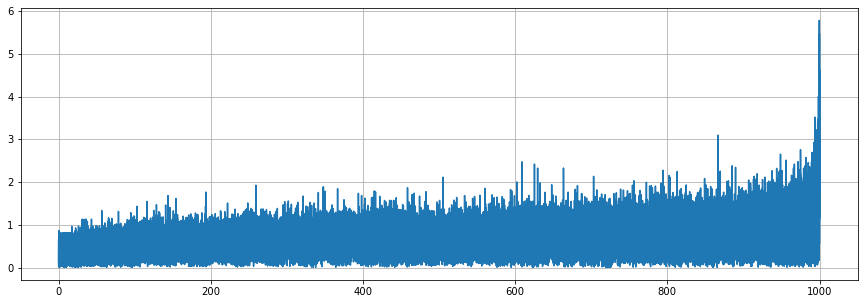

In [3]:
plt.figure(figsize=(15,5))
plt.plot(errors.q, errors.rmsse)
plt.grid()
plt.show()

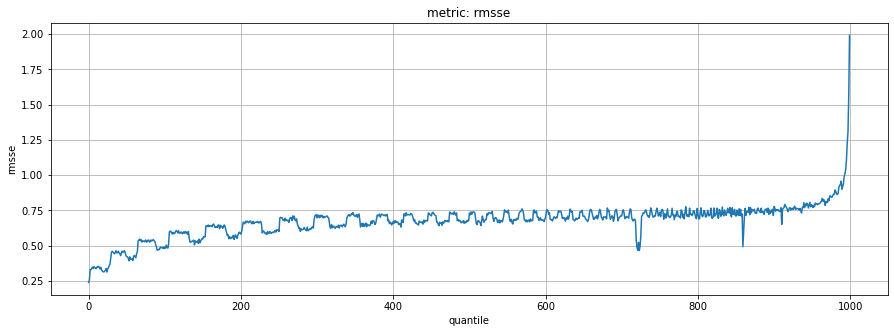

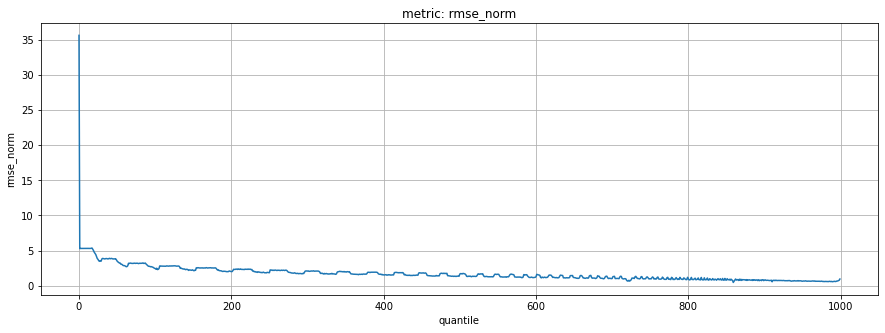

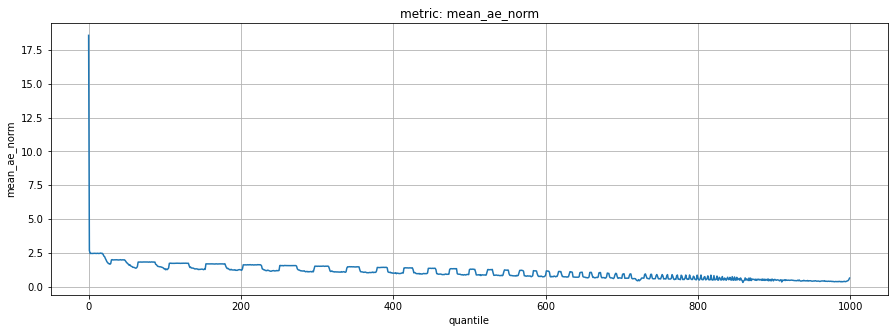

In [4]:
metrics = ["rmsse", "rmse_norm", "mean_ae_norm"]

for metric in metrics:
    gb = errors.groupby("qd")[metric].mean()
    plt.figure(figsize=(15,5))
    plt.plot(gb.index, gb.values, "-")
    plt.title(f"metric: {metric}")
    plt.xlabel("quantile")
    plt.ylabel(metric)
    plt.grid()
    plt.show()

In [5]:
errors.query("qd >= 950")

,sku,rmse,mean_ae,median_ae,residual_std,residual_mad,scale,site_id,q_mean,rmsse,rmse_norm,mean_ae_norm,median_ae_norm,residual_std_norm,residual_mad_norm,scale_norm,q,qd
400532,419144,3.493447,1.166135,0.069781,3.524804,1.457524,4.072617,MLM,4.907322,0.857789,0.711885,0.237632,0.014220,0.718274,0.297010,0.829906,950.001423,950
400533,33831,3.064126,2.078573,1.213235,3.107940,2.173519,3.513521,MLB,4.907559,0.872096,0.624369,0.423545,0.247218,0.633297,0.442892,0.715941,950.003795,950
400534,33804,2.250933,1.054313,0.080486,2.218569,1.382994,3.600766,MLM,4.907599,0.625126,0.458663,0.214833,0.016400,0.452068,0.281807,0.733712,950.006167,950
400535,63066,3.282685,2.386835,1.802690,3.330391,2.485001,4.008611,MLB,4.907735,0.818908,0.668880,0.486342,0.367316,0.678601,0.506344,0.816795,950.008539,950
400536,612850,4.100952,2.584565,1.911291,3.980443,2.882186,4.651659,MLM,4.908223,0.881611,0.835527,0.526579,0.389406,0.810974,0.587216,0.947728,950.010911,950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421607,578318,1118.381830,858.249500,1039.429404,732.928563,608.665830,431.413255,MLM,1233.233523,2.592368,0.906869,0.695934,0.842849,0.594314,0.493553,0.349823,999.988141,999
421608,36584,1750.013361,1236.970702,1204.363980,1260.108322,1017.705955,654.112165,MLB,1830.987194,2.675403,0.955776,0.675576,0.657768,0.688213,0.555824,0.357246,999.990513,999
421609,342848,2230.942445,1307.988493,577.751978,1840.144255,1330.038650,818.804406,MLB,1950.615574,2.724634,1.143712,0.670552,0.296190,0.943366,0.681856,0.419767,999.992884,999
421610,535060,2317.785005,2009.905389,1911.429404,1175.614811,700.225799,1096.345709,MLM,2120.979377,2.114100,1.092790,0.947631,0.901201,0.554279,0.330143,0.516905,999.995256,999


In [7]:
errors.query("qd >= 950").groupby("site_id")["sku"].count()

site_id
MLA    1787
MLB    9403
MLM    9890
Name: sku, dtype: int64

***